In [1]:
from numpy import *
import MDAnalysis as mda
import MDAnalysis.analysis.distances
from pylab import *
style.use('seaborn-poster')
import glob
import scipy.stats
import seaborn as sns

In [2]:
#compile all the systems in one list
system_names = ['No-PEG','PEG']
#[]
#[tol-darkgreen,tol-darkblue,tol-bottompurple]
twoColour=["#332288","#882255"]
# Dark green,    
#sixColor=['#0A732D','#332288','#88CCEE',"#44AA99",'#882255','#D250BC']
#colorScheme=sixColor
colourScheme = twoColour



importantResids = [14,42,43,44,46,59,62,63,64,65,66,69,70,91,93,95,109,143,144,145,146,148,161,163,177,181,197,198,199,213,214,215]
EQPOINT = 250

(-1.5, 1.5)

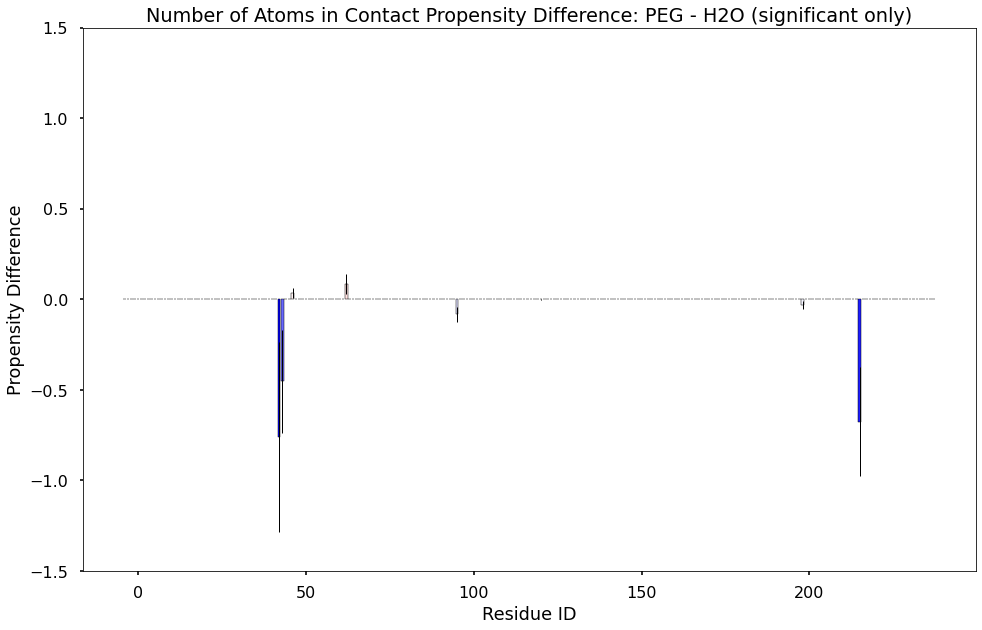

In [3]:
nAtomsInContactWithCH6byResidue_SignificantDifferenceBars=load("nAtomsInContactWithCH6byResidue_SignificantDifferenceBars.npy")
nAtomsInContactWithCH6byResidue_SignificantDifferenceSEMs=load("nAtomsInContactWithCH6byResidue_SignificantDifferenceSEMs.npy")


colors =[]
for i in range(len(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars)):
    if nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i] > 0:
        colors.append([1.,1-(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i]/max(abs(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars))),1-(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i]/max(abs(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars)))])
    if nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i] <=0:
        colors.append([1-(-nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i]/max(abs(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars))),1-(-nAtomsInContactWithCH6byResidue_SignificantDifferenceBars[i]/max(abs(nAtomsInContactWithCH6byResidue_SignificantDifferenceBars))),1.])
        
        
figure(figsize = (16,10))

bar(arange(-4.5,238.5,1)[:-1]+.5,nAtomsInContactWithCH6byResidue_SignificantDifferenceBars,color = colors,edgecolor= 'black')
errorbar(arange(-4.5,238.5,1)[:-1]+.5,nAtomsInContactWithCH6byResidue_SignificantDifferenceBars,nAtomsInContactWithCH6byResidue_SignificantDifferenceSEMs,fmt=".",markersize = 0.01,linewidth = 1, color = "black")
xlabel("Residue ID")
ylabel("Propensity Difference")
title("Number of Atoms in Contact Propensity Difference: PEG - H2O (significant only)") 
ylim(-1.5,1.5)

#axvline(42)

#savefig("nAtomsInContactPropensityDifferenceMap.png",dpi = 600)

# Convex Volume

/home/liam/.local/lib/python3.10/site-packages/matplotlib/tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/liam/.local/lib/python3.10/site-packages/matplotlib/tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/liam/.local/lib/python3.10/site-packages/matplotlib/patches.py:749: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/liam/.local/lib/python3.10/site-packages/matplotlib/patches.py:750: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)


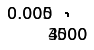

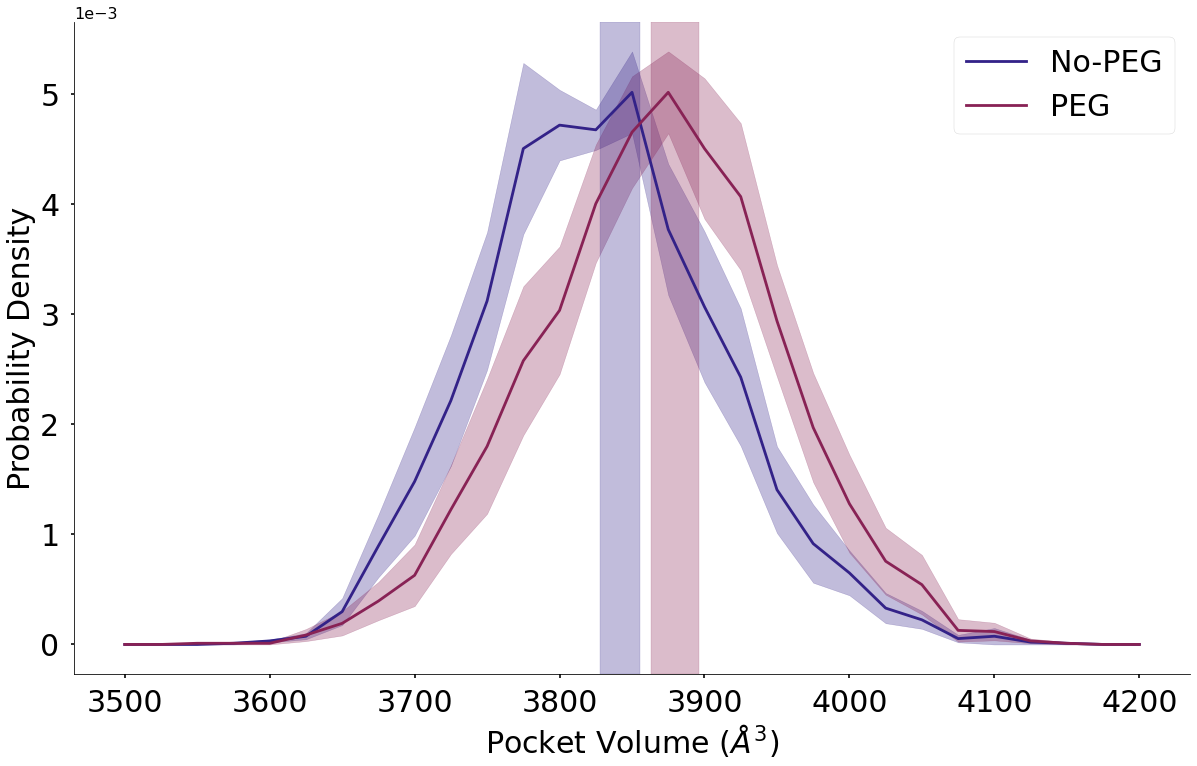

In [4]:
all_convex = load("all_convex.npy")


all_convex_hists=[]

figure(figsize = (0,0))
for i in range(len(all_convex)):
    sub=[]
    for j in range(len(all_convex[i])):
        a=hist(all_convex[i][j],bins = arange(3500,4250,25),density = True,alpha = 0.8,color= colourScheme[0],label = system_names[0])
        sub.append(a[0])
    all_convex_hists.append(sub)
system_avg_convex=[]
system_sem_convex=[]

for i in range(len(all_convex)):
    system_avg_convex.append(mean(all_convex_hists[i],axis = 0))
    system_sem_convex.append(scipy.stats.sem(all_convex_hists[i],axis = 0))
    

trjmeans = []
for i in range(len(all_convex)):
    sub = []
    for j in range(len(all_convex[i])):
        sub.append(mean(all_convex[i][j]))
    trjmeans.append(sub)
    
actualMean= [mean(trjmeans[0]),mean(trjmeans[1])]
actualSem = [scipy.stats.sem(trjmeans[0]),scipy.stats.sem(trjmeans[1])]





mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

figure(figsize = (20,12))
ticklabel_format(style='sci', axis='y', scilimits=(1,4))

plot(arange(3500,4250,25)[:-1],system_avg_convex[0],color = colourScheme[0],label = system_names[0])
plot(arange(3500,4250,25)[:-1],system_avg_convex[1],color = colourScheme[1],label = system_names[1])


fill_between(arange(3500,4250,25)[:-1], system_avg_convex[0] - system_sem_convex[0],system_avg_convex[0] + system_sem_convex[0],color = colourScheme[0],alpha = 0.3)
fill_between(arange(3500,4250,25)[:-1], system_avg_convex[1] - system_sem_convex[1],system_avg_convex[1] + system_sem_convex[1],color = colourScheme[1],alpha = 0.3)


xlabel("Pocket Volume ($\AA^3$)",fontsize = 30)
ylabel("Probability Density",fontsize = 30)
#title("Convex Hull Volume of Important Residue CA",fontsize = 30)
xticks(fontsize = 30)
yticks(fontsize = 30)

legend(fontsize = 30)

axvspan(actualMean[0] - actualSem[0],actualMean[0]+actualSem[0], color = colourScheme[0], alpha = 0.3)
axvspan(actualMean[1] - actualSem[1],actualMean[1]+actualSem[1], color = colourScheme[1], alpha = 0.3)


savefig("ConvexHullVolumes.png",dpi = 600)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 1000)
newcolors = viridis(np.linspace(0, 1, 1000))
#This is what you pick
rs = concatenate([linspace(51,256,500),linspace(256,136,500)])/256
gs = concatenate([linspace(34,256,500),linspace(256,34,500)])/256
bs = concatenate([linspace(136,256,500),linspace(256,85,500)])/256
newColours = []
for i in range(len(rs)):
    newColours.append([rs[i],gs[i],bs[i],1])
newcolors = newColours
newcmp = ListedColormap(newcolors)
# K the peg colour we are usingn is: #882255   -   rgb(136, 34, 85)
#andthe nopegcolour we ar eusing is: #332288   -   rgb(51, 34, 136)

# CA DIstances

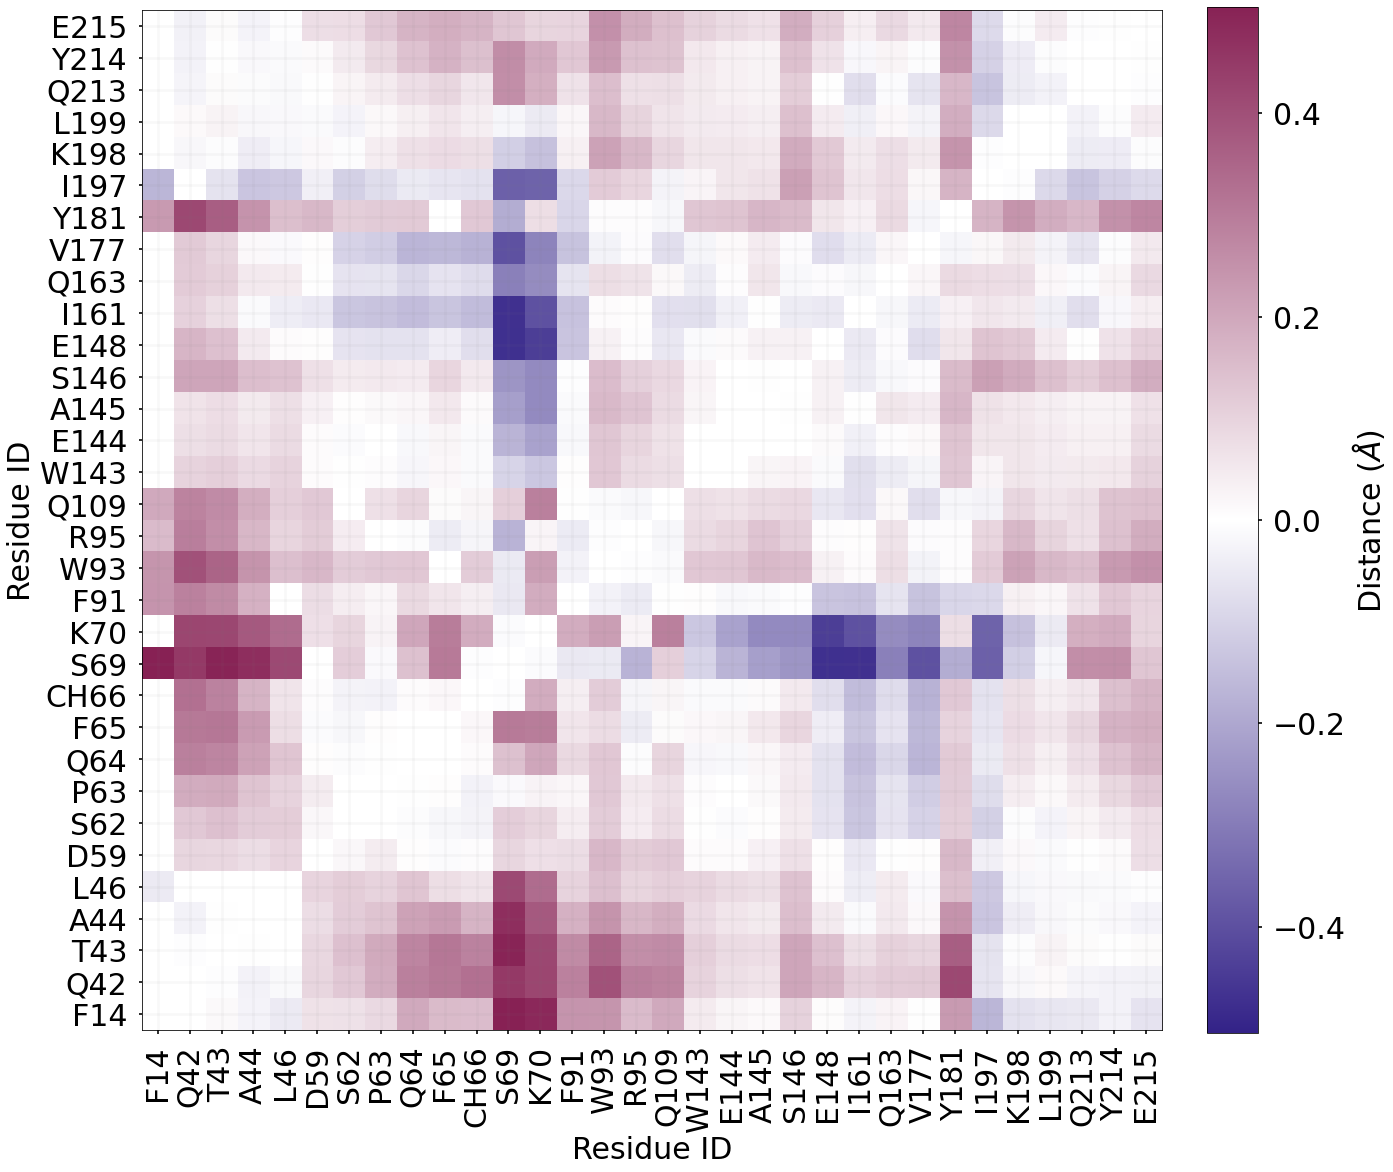

In [6]:
ImportantResidueCAPairwiseDistanceDifferenceMap=load("ImportantResidueCAPairwiseDistanceDifferenceMap.npy")



importantResidStrings = ["F14",
                         "Q42",
                         "T43",
                         "A44",
                         "L46",
                         "D59",
                         "S62",
                         "P63",
                         "Q64",
                         "F65",
                         "CH66",
                         "S69",
                         "K70",
                         "F91",
                         "W93",
                         "R95",
                         "Q109",
                         "W143",
                         "E144",
                         "A145",
                         "S146",
                         "E148",
                         "I161",
                         "Q163",
                         "V177",
                         "Y181",
                         "I197",
                         "K198",
                         "L199",
                         "Q213",
                         "Y214",
                         "E215"]

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

drange = max(abs(ImportantResidueCAPairwiseDistanceDifferenceMap).flatten())

figure(figsize = (20,20))
imshow(ImportantResidueCAPairwiseDistanceDifferenceMap,origin = "lower",cmap=newcmp,vmin=-drange,vmax=drange)#,extent = (resids_proper[0]-0.5,resids_proper[-1]+0.5,resids_proper[0]-0.5,resids_proper[-1]+0.5))

#5.55.55.5
cbar=colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=30) 
cbar.set_label("Distance ($\AA$)",fontsize = 30)
xlabel("Residue ID",fontsize = 30)
ylabel("Residue ID",fontsize = 30)
#title("Important Residue CA Distances (significant only): " +system_names[1] + " - " + system_names[0],fontsize = 30)
dsfasfvdas=xticks(arange(len(importantResids)),importantResidStrings,fontsize = 30,rotation = 90)
asdvfasdvfav=yticks(arange(len(importantResids)),importantResidStrings,fontsize = 30)
  
        
for i in range(len(importantResids)):
    axvline(i,color = "grey",alpha = 0.05)
    axhline(i,color = "grey",alpha = 0.05)
savefig("ImportantResidueCADistancesDifferenceMap.png",dpi = 600)    
    
    
    

    
    
    
    
#B1:  13-23
#B2:  26-37
#B3:  42-51
#B4:  91-99
#B5:  104-114
#B6:  117-127
#B7:  140-153 (ex 145)
#B8:  156-167
#B9:  172-183
#B10: 193-204
#B11: 210-221  (reduced slightly in noPEG from 215-221)



#axvspan(-.5,.5,alpha = 0.1, color  = [0,0.0,0])    #b1
#axvspan(.5,4.5,alpha = 0.1, color  = [0.,0.5,0.])    #B3
#axvspan(4.5,12.5,alpha = 0.1, color  = [0.8,0.0,0.])    #helix
#axvspan(12.5,15.5,alpha = 0.1, color  = [0.3,0.99,0.3])    #b4
#axvspan(15.5,16.5,alpha = 0.1, color  = [0.5,0.99,0.])    #b5
#axvspan(16.5,21.5,alpha = 0.2, color  = [0.8,0.99,0.])    #b7
#axvspan(21.5,23.5,alpha = 0.1, color  = [0.8,0.4,0.4])    #b8
#axvspan(23.5,25.5,alpha = 0.1, color  = [0.1,0.0,0.99])    #b9
#axvspan(25.5,28.5,alpha = 0.1, color  = [0.1,0.5,0.99])    #b10
#axvspan(28.5,31.5,alpha = 0.1, color  = [0.0,0.0,0.5])    #b11
#
#
#
#
#axhspan(-.5,.5,alpha = 0.1, color  = [0,0.0,0])    #b1
#axhspan(.5,4.5,alpha = 0.1, color  = [0.,0.5,0.])    #B3
#axhspan(4.5,12.5,alpha = 0.1, color  = [0.8,0.0,0.])    #helix
#axhspan(12.5,15.5,alpha = 0.1, color  = [0.3,0.99,0.3])    #b4
#axhspan(15.5,16.5,alpha = 0.1, color  = [0.5,0.99,0.])    #b5
#axhspan(16.5,21.5,alpha = 0.2, color  = [0.8,0.99,0.])    #b7
#axhspan(21.5,23.5,alpha = 0.1, color  = [0.8,0.4,0.4])    #b8
#axhspan(23.5,25.5,alpha = 0.1, color  = [0.1,0.0,0.99])    #b9
#axhspan(25.5,28.5,alpha = 0.1, color  = [0.1,0.5,0.99])    #b10
#axhspan(28.5,31.5,alpha = 0.1, color  = [0.0,0.0,0.5])    #b11    



# Rg

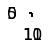

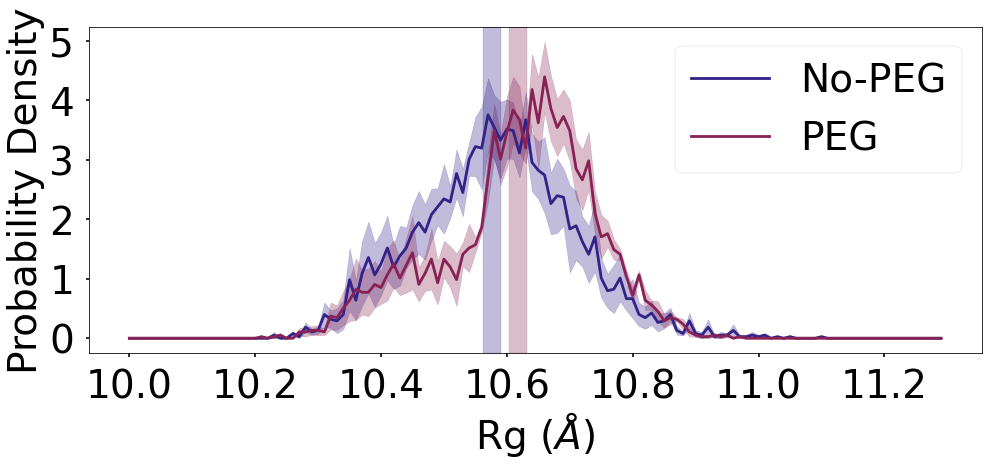

In [7]:
importantrgsca=load("ImportantResidueCARgs.npy")

all_importantrg_histsca=[]
figure(figsize = (0,0))

for i in range(len(importantrgsca)):
    sub=[]
    for j in range(len(importantrgsca[i])):
        a=hist(importantrgsca[i][j][EQPOINT:],bins = arange(10,11.3,0.01),density = True,alpha = 0.8,color= colourScheme[0],label = system_names[0])
        sub.append(a[0])
    all_importantrg_histsca.append(sub)
    
system_avg_importantrgsca=[]
system_sem_importantrgsca=[]

for i in range(len(all_importantrg_histsca)):
    system_avg_importantrgsca.append(mean(all_importantrg_histsca[i],axis = 0))
    system_sem_importantrgsca.append(scipy.stats.sem(all_importantrg_histsca[i],axis = 0))
    
    
    
    
trjmeans = []
for i in range(len(importantrgsca)):
    sub = []
    for j in range(len(importantrgsca[i])):
        sub.append(mean(importantrgsca[i][j]))
    trjmeans.append(sub)
    
actualMean= [mean(trjmeans[0]),mean(trjmeans[1])]
actualSem = [scipy.stats.sem(trjmeans[0]),scipy.stats.sem(trjmeans[1])]




figure(figsize = (16,6))
plot(arange(10,11.3,0.01)[:-1],system_avg_importantrgsca[0],color = colourScheme[0],label = system_names[0])
plot(arange(10,11.3,0.01)[:-1],system_avg_importantrgsca[1],color = colourScheme[1],label = system_names[1])


fill_between(arange(10,11.3,0.01)[:-1], system_avg_importantrgsca[0] - system_sem_importantrgsca[0],system_avg_importantrgsca[0] + system_sem_importantrgsca[0],color = colourScheme[0],alpha = 0.3)
fill_between(arange(10,11.3,0.01)[:-1], system_avg_importantrgsca[1] - system_sem_importantrgsca[1],system_avg_importantrgsca[1] + system_sem_importantrgsca[1],color = colourScheme[1],alpha = 0.3)


xlabel("Rg ($\AA$)",fontsize = 39)
ylabel("Probability Density",fontsize = 39)
#title("Important Residue CA Rg",fontsize = 25)
xticks(fontsize = 39)
yticks(fontsize = 39)

legend(fontsize = 39)


axvspan(actualMean[0] - actualSem[0],actualMean[0]+actualSem[0], color = colourScheme[0], alpha = 0.3)
axvspan(actualMean[1] - actualSem[1],actualMean[1]+actualSem[1], color = colourScheme[1], alpha = 0.3)


savefig("ImportantResidueCARgDistributions.png",dpi = 600)

# Beta Gap

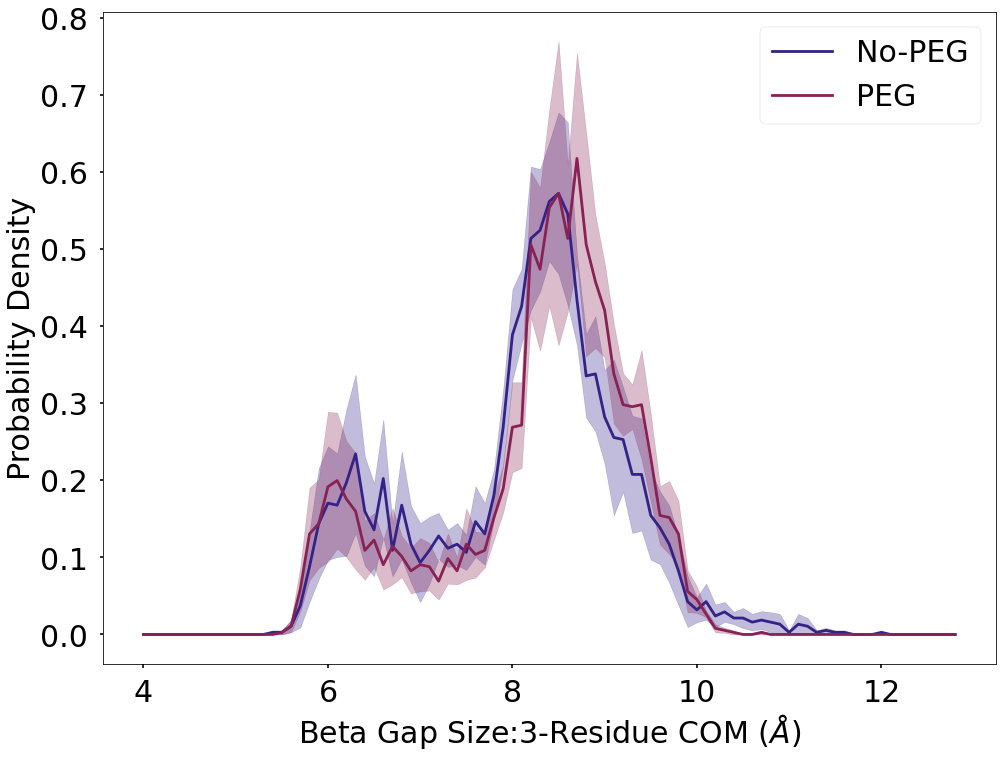

In [8]:
betagap_mean_hists_COM = load("betaGapMeanHists.npy")
betagap_ster_hists_COM = load("betaGapSterHists.npy")

figure(figsize = (16,12))
plot(arange(4,13,0.1)[:-1],betagap_mean_hists_COM[0],color = colourScheme[0],label = system_names[0])
plot(arange(4,13,0.1)[:-1],betagap_mean_hists_COM[1],color = colourScheme[1],label = system_names[1])


fill_between(arange(4,13,0.1)[:-1], betagap_mean_hists_COM[0] - betagap_ster_hists_COM[0],betagap_mean_hists_COM[0] + betagap_ster_hists_COM[0],color = colourScheme[0],alpha = 0.3)
fill_between(arange(4,13,0.1)[:-1], betagap_mean_hists_COM[1] - betagap_ster_hists_COM[1],betagap_mean_hists_COM[1] + betagap_ster_hists_COM[1],color = colourScheme[1],alpha = 0.3)


xlabel("Beta Gap Size:3-Residue COM ($\AA$)",fontsize = 30)
ylabel("Probability Density",fontsize = 30)
#title("Beta-Gap Width",fontsize = 30)
xticks(fontsize = 30)
yticks(fontsize = 30)

legend(fontsize = 30)



savefig("BetaGapWidth3ResidueCOM.png",dpi = 600)

# nWaters - Pocket

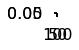

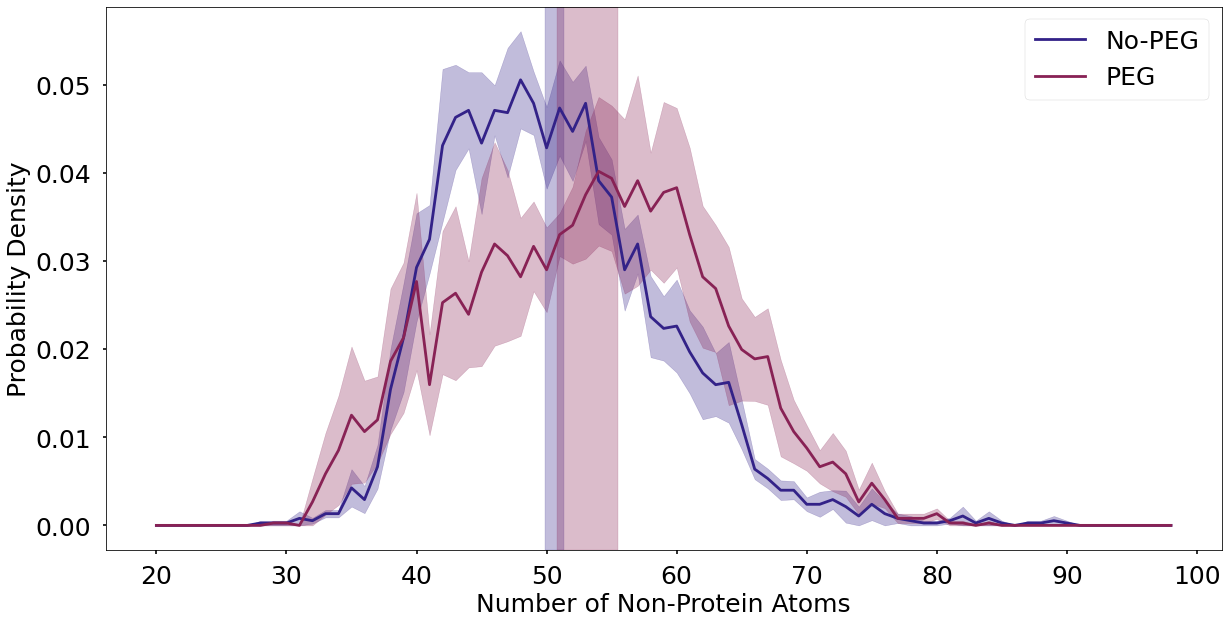

In [9]:
all_nwaters=load("nWatersInConvexHullOfCAOfImportantResidues.npy")


all_nwaters_hists=[]
figure(figsize = (0,0))

for i in range(len(all_nwaters)):
    sub=[]
    for j in range(len(all_nwaters[i])):
        a=hist(all_nwaters[i][j],bins = arange(20,100,1),density = True,alpha = 0.8,color= colourScheme[0],label = system_names[0])
        sub.append(a[0])
    all_nwaters_hists.append(sub)
    
system_avg_nwaters=[]
system_sem_nwaters=[]

for i in range(len(all_nwaters)):
    system_avg_nwaters.append(mean(all_nwaters_hists[i],axis = 0))
    system_sem_nwaters.append(scipy.stats.sem(all_nwaters_hists[i],axis = 0))
    
    
    
    

trjmeans = []
for i in range(len(all_nwaters)):
    sub = []
    for j in range(len(all_nwaters[i])):
        sub.append(mean(all_nwaters[i][j]))
    trjmeans.append(sub)
    
actualMean= [mean(trjmeans[0]),mean(trjmeans[1])]
actualSem = [scipy.stats.sem(trjmeans[0]),scipy.stats.sem(trjmeans[1])]



figure(figsize = (20,10))
plot(arange(20,100,1)[:-1],system_avg_nwaters[0],color = colourScheme[0],label = system_names[0])
plot(arange(20,100,1)[:-1],system_avg_nwaters[1],color = colourScheme[1],label = system_names[1])


fill_between(arange(20,100,1)[:-1], system_avg_nwaters[0] - system_sem_nwaters[0],system_avg_nwaters[0] + system_sem_nwaters[0],color = colourScheme[0],alpha = 0.3)
fill_between(arange(20,100,1)[:-1], system_avg_nwaters[1] - system_sem_nwaters[1],system_avg_nwaters[1] + system_sem_nwaters[1],color = colourScheme[1],alpha = 0.3)


xlabel("Number of Non-Protein Atoms",fontsize = 25)
ylabel("Probability Density",fontsize = 25)
xticks(fontsize = 25)
yticks(fontsize = 25)

legend(fontsize = 25)

axvspan(actualMean[0] - actualSem[0],actualMean[0]+actualSem[0], color = colourScheme[0], alpha = 0.3)
axvspan(actualMean[1] - actualSem[1],actualMean[1]+actualSem[1], color = colourScheme[1], alpha = 0.3)


savefig("nPocketNonProteinAtoms.png",dpi = 600)

# CH6- HBonds

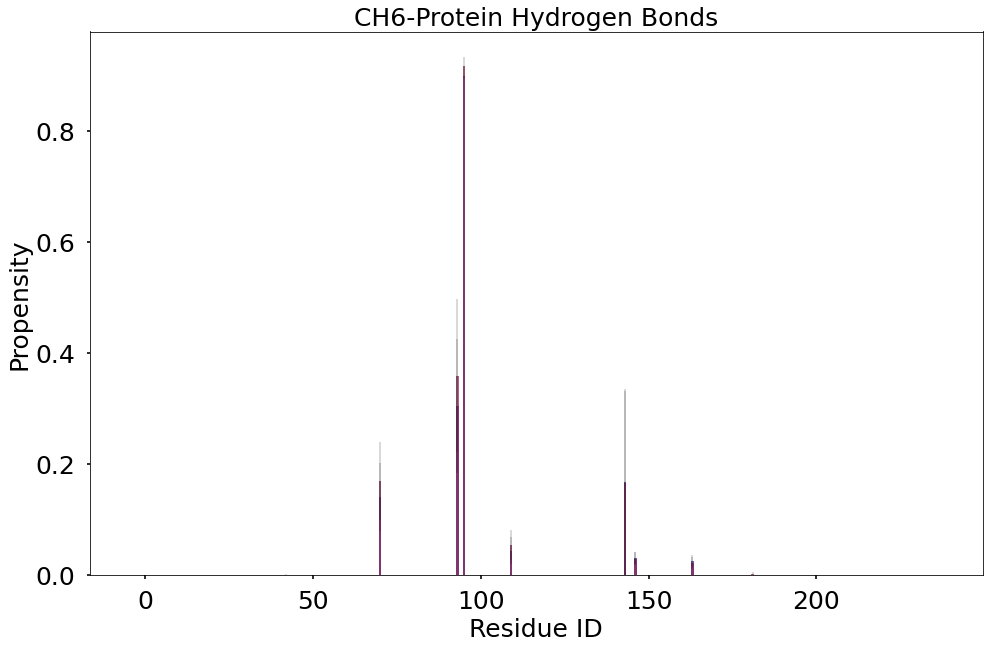

In [10]:
all_ch6_hb_propensities=load("all_ch6_hbond_propensities.npy")

system_avg_ch6_hb_propensities=[]
system_sem_ch6_hb_propensities=[]

for i in range(len(all_ch6_hb_propensities)):
    system_avg_ch6_hb_propensities.append(mean(all_ch6_hb_propensities[i],axis = 0))
    system_sem_ch6_hb_propensities.append(scipy.stats.sem(all_ch6_hb_propensities[i],axis = 0))
figure(figsize = (16,10))

bar(arange(-4.5,238.5,1)[:-1]+.5,system_avg_ch6_hb_propensities[0],color = colourScheme[0],alpha = 0.7)
bar(arange(-4.5,238.5,1)[:-1]+.5,system_avg_ch6_hb_propensities[1],color = colourScheme[1],alpha = 0.7)
errorbar(arange(-4.5,238.5,1)[:-1]+.5,system_avg_ch6_hb_propensities[0],system_sem_ch6_hb_propensities[0],fmt=".",markersize = 0.01,linewidth = .3, color = "black")
errorbar(arange(-4.5,238.5,1)[:-1]+.5,system_avg_ch6_hb_propensities[1],system_sem_ch6_hb_propensities[1],fmt=".",markersize = 0.01,linewidth = .3, color = "black")
xlabel("Residue ID",fontsize = 25)
ylabel("Propensity",fontsize = 25)
title("CH6-Protein Hydrogen Bonds",fontsize = 25) 
asdfaskufhvkasduf = xticks(fontsize = 25)
lkfahuksjrhfawkjh = yticks(fontsize = 25)

savefig("CH6ProteinHBondPropensity.png",dpi = 600)

# Q163 Chi1

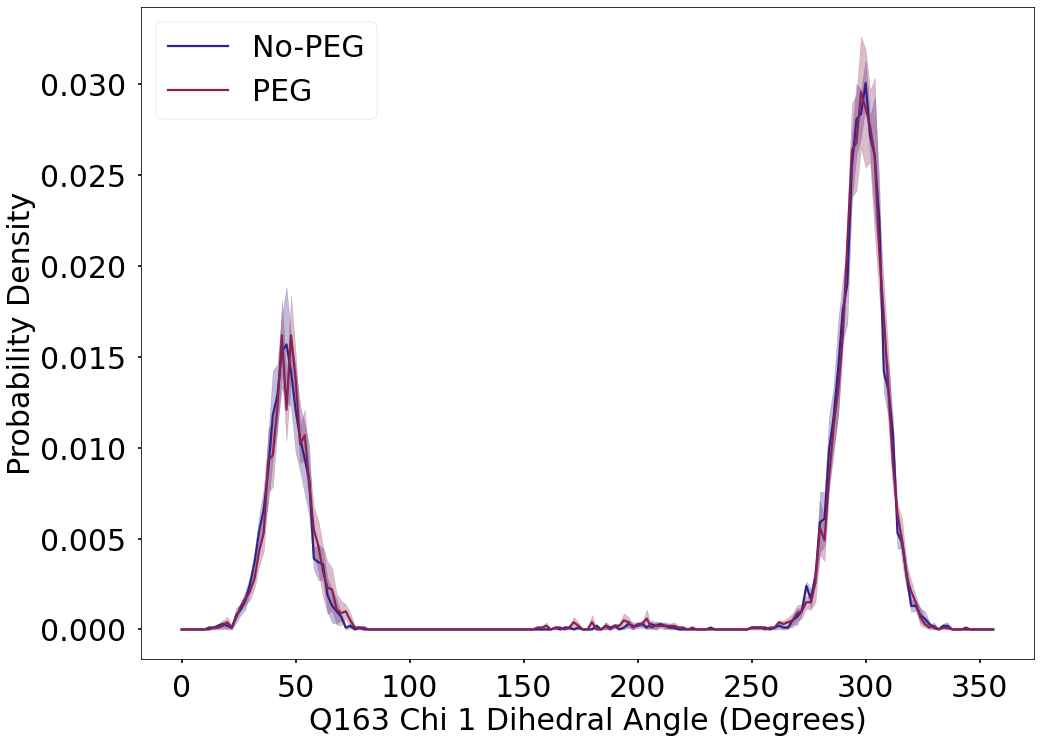

In [11]:
all_163_chi1=load("all_163_chi1.npy")

def AllToSystem(allList):
    systemavg=[]
    systemsem=[]
    for i in range(len(allList)):
        systemavg.append(mean(allList[i],axis = 0))
        systemsem.append(scipy.stats.sem(allList[i],axis = 0))
    return systemavg,systemsem
system_avg_163_chi1,system_sem_163_chi1 = AllToSystem(all_163_chi1)



figure(figsize = (16,12))
plot(arange(0,360,2)[:-1],system_avg_163_chi1[0],color = colourScheme[0],label = system_names[0],linewidth = 2.2)
plot(arange(0,360,2)[:-1],system_avg_163_chi1[1],color = colourScheme[1],label = system_names[1],linewidth = 2.2)

fill_between(arange(0,360,2)[:-1],system_avg_163_chi1[0] - system_sem_163_chi1[0],system_avg_163_chi1[0] + system_sem_163_chi1[0],color = colourScheme[0],alpha = 0.3)
fill_between(arange(0,360,2)[:-1],system_avg_163_chi1[1] - system_sem_163_chi1[1],system_avg_163_chi1[1] + system_sem_163_chi1[1],color = colourScheme[1],alpha = 0.3)


xlabel("Q163 Chi 1 Dihedral Angle (Degrees)",fontsize = 30)
ylabel("Probability Density",fontsize = 30)

#title("PEG vs noPEG residue 163 Dihedral CHI-1 Distribu tion",fontsize = 25)
psdfva=xticks(fontsize = 30)
oasdjfo = yticks(fontsize = 30)
legend(fontsize = 30,loc = "upper left")


savefig("Q163Chi1Distributions.png",dpi = 600)

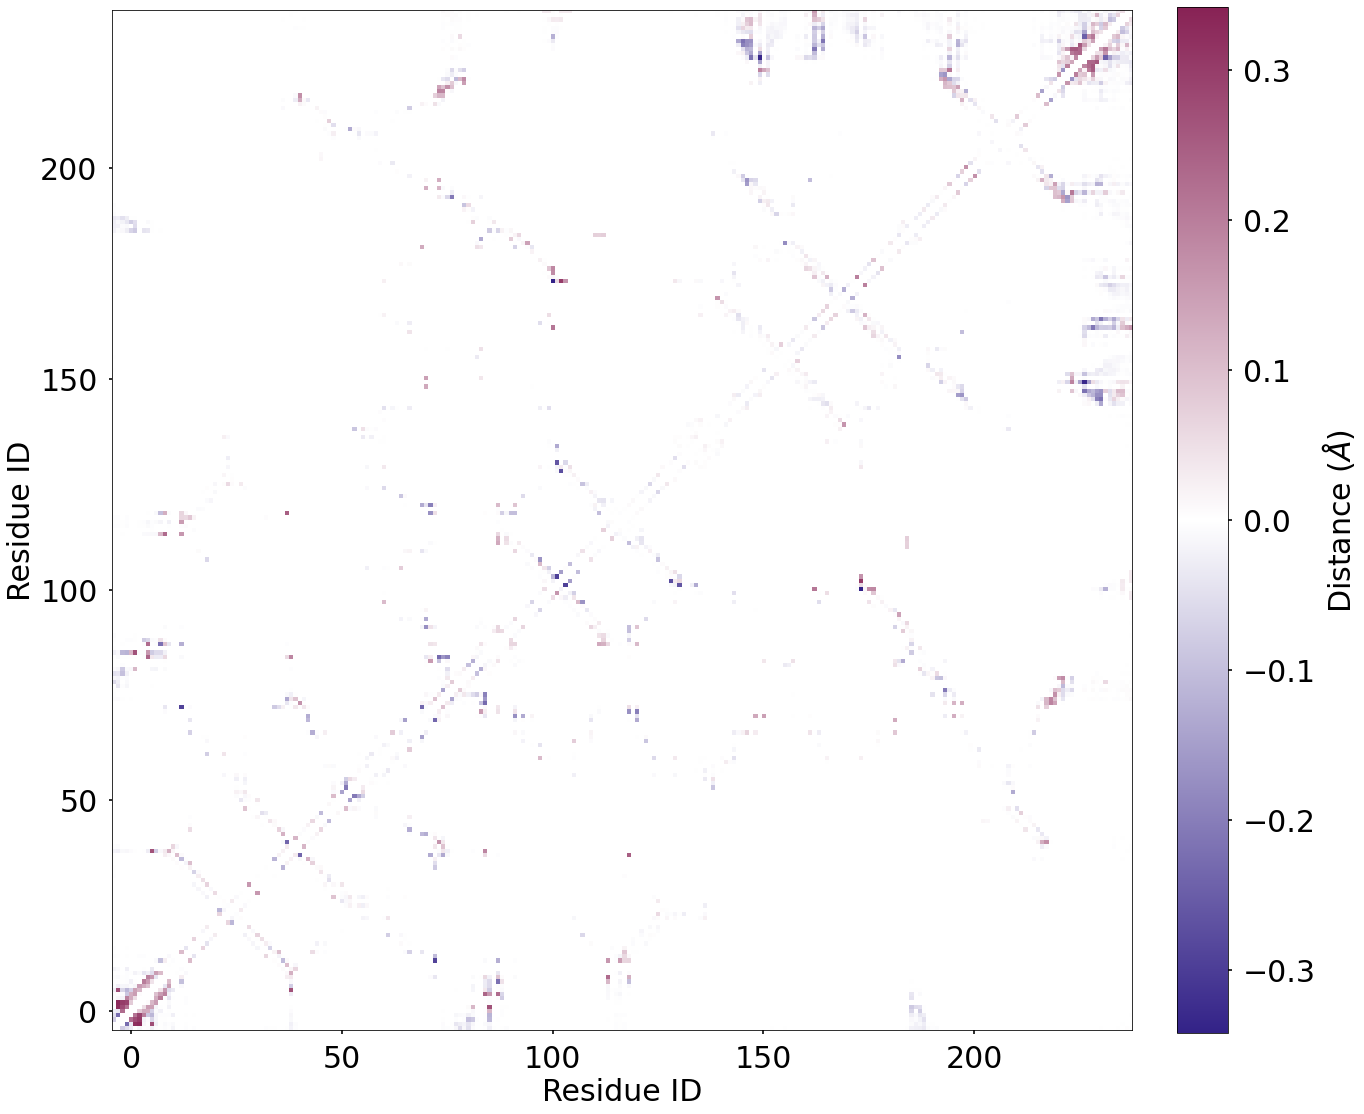

In [12]:
fullContactMap=load("fullContactDifferenceMap.npy")
resids_proper=list(arange(-4,67))+list(arange(69,238))


mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
drange = max(abs(fullContactMap).flatten())

figure(figsize = (20,20))
imshow(fullContactMap,origin = "lower",cmap=newcmp,vmin=-drange,vmax=drange,extent = (resids_proper[0]-0.5,resids_proper[-1]+0.5,resids_proper[0]-0.5,resids_proper[-1]+0.5))

#5.55.55.5
cbar=colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=30) 
cbar.set_label("Distance ($\AA$)",fontsize = 30)
xlabel("Residue ID",fontsize = 30)
ylabel("Residue ID",fontsize = 30)
#title("Important Residue CA Distances (significant only): " +system_names[1] + " - " + system_names[0],fontsize = 30)
dsfasfvdas=xticks(fontsize = 30)
asdvfasdvfav=yticks(fontsize = 30)
  

savefig("FullContactMap.png",dpi = 600)



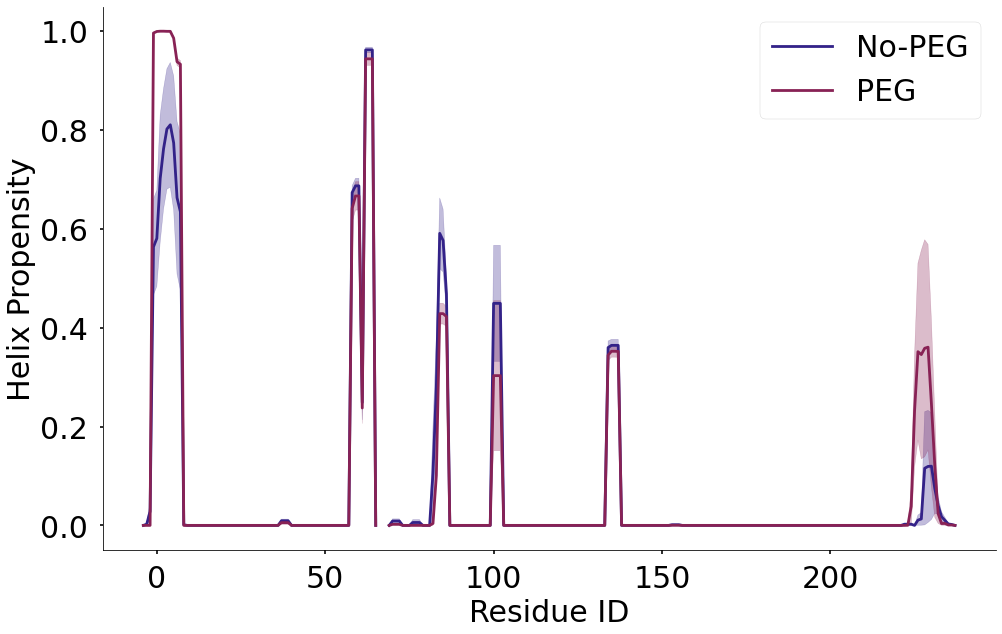

In [23]:
system_helicity_withnans = load("system_helicity_withnans.npy")
sem_helicity_withnans = load("sem_helicity_withnans.npy")

resids_mdtraj=list(arange(-4,66))+[nan,nan,nan]+list(arange(69,238))

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


figure(figsize = (16,10))

plot(resids_mdtraj,system_helicity_withnans[0],color = colourScheme[0],label = system_names[0])
plot(resids_mdtraj,system_helicity_withnans[1],color = colourScheme[1],label = system_names[1])
fill_between(resids_mdtraj,system_helicity_withnans[0] - sem_helicity_withnans[0],system_helicity_withnans[0]+sem_helicity_withnans[0],color = colourScheme[0],alpha = 0.3)
fill_between(resids_mdtraj,system_helicity_withnans[1] - sem_helicity_withnans[1],system_helicity_withnans[1]+sem_helicity_withnans[1],color = colourScheme[1],alpha = 0.3)

xlabel("Residue ID",fontsize = 30)
ylabel("Helix Propensity",fontsize = 30)
xticks(fontsize = 30)
yticks(fontsize = 30)
legend(fontsize = 30)

savefig("system_helicity.png",dpi = 600)

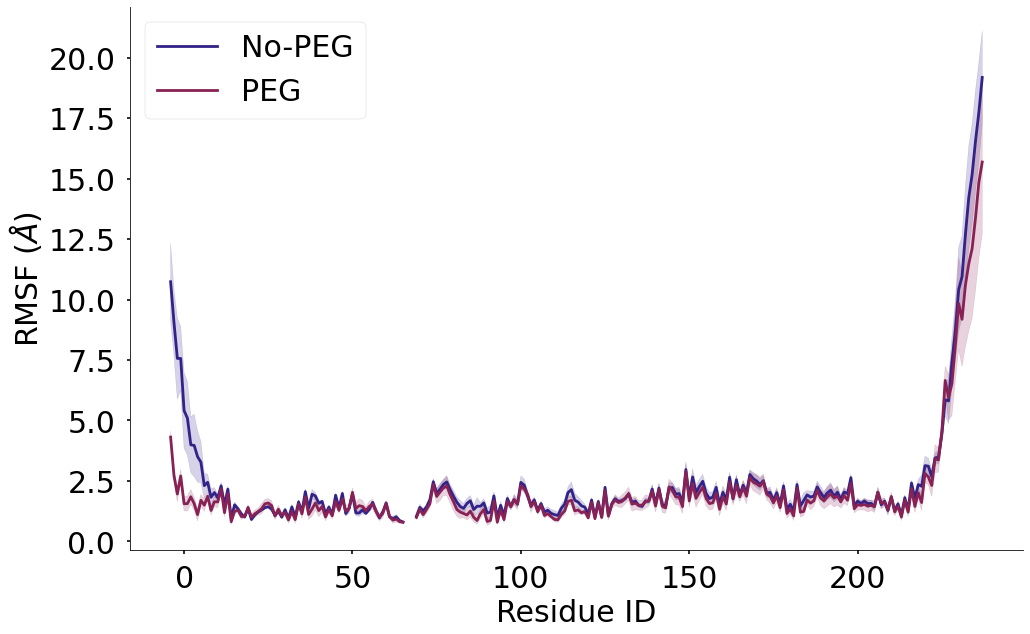

In [24]:
system_rmsf_withnans=load("system_rmsf_withnans.npy")
sem_rmsf_withnans=load("sem_rmsf_withnans.npy")
resids=list(arange(-4,67))+[nan,nan]+list(arange(69,238))#get universes 

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#style.use("seaborn-poster")
figure(figsize = (16,10))
for i in range(len(system_rmsf_withnans)):
    plot(resids,system_rmsf_withnans[i],color = colourScheme[i],label = system_names[i])
    fill_between(resids,system_rmsf_withnans[i] - sem_rmsf_withnans[i], system_rmsf_withnans[i] + sem_rmsf_withnans[i],color = colourScheme[i],alpha = 0.2)


legend(fontsize = 30)

xlabel("Residue ID",fontsize = 30)
ylabel("RMSF ($\AA$)",fontsize = 30)
adsfvadsfvasd=xticks(fontsize = 30)
vfdavfdasfvsd=yticks(fontsize = 30)
savefig("system_rmsf.png",dpi = 600)